by Yaroslava Lochman

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import matplotlib as mpl
mpl.rcParams['image.cmap'] = 'inferno'

In [2]:
df = pd.read_csv('data.csv', header=1)

# New York Times 

In [3]:
df['Mean'] = df.loc[:,'Jan':'Dec'].mean(1)
df.index = df.Year
m19 = df.loc[1880:1900,'Mean'].mean()
df['RelMean'] = df.loc[:,'Mean'] - m19

/Users/Yaroslava/anaconda/lib/python3.7/site-packages/matplotlib/font_manager.py:1238: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))


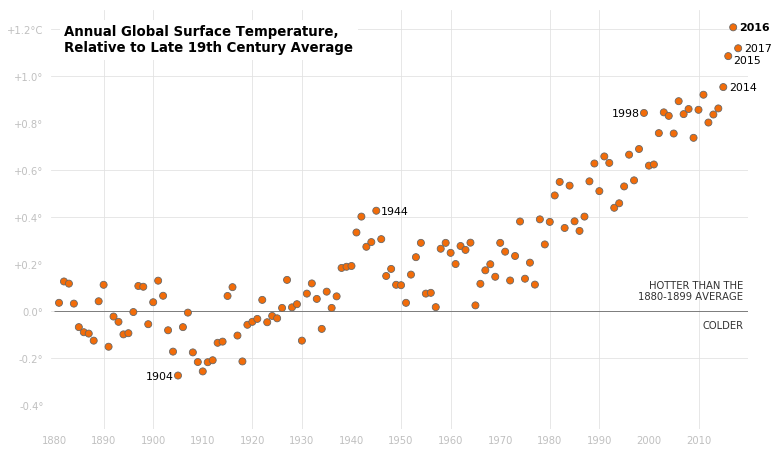

In [4]:
scatter_RGB = np.array([[242, 108, 9]]) / 255
grid_RGB = 225 / 255 * np.ones(3)
text_RGB = 192 / 255 * np.ones(3)
line_RGB = 102 / 255 * np.ones(3)
text2_RGB = 50 / 255 * np.ones(3)

mpl.rcParams['figure.figsize'] = (12.5,7.7)
plt.rcParams['ytick.color'] = text_RGB
plt.rcParams['xtick.color'] = text_RGB
plt.rcParams['grid.color'] = grid_RGB
plt.rcParams['text.color'] = text2_RGB
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.stretch'] = 'ultra-condensed'
plt.rcParams['font.serif'] = 'Times'


N = len(df)

fig = plt.figure()
ax = fig.add_subplot(111)

years = np.arange(1880,2020,10)
years_ticks = sorted(list(set(years).difference(np.arange(1880,2020,30))))
degrees = np.round(np.linspace(-0.4, 1.2, 9), 1)
degrees_ticks = sorted(list(set(degrees).difference(set(np.round(np.linspace(-0.4,0.8,3),1)))))

ax.set_frame_on(False)
ax.grid(True, 'major')
ax.set_xlim(1879.3, 2020)
ax.set_ylim(-0.5, 1.28)

def to_C_str(x, C=''):
    return '{}{}°{}'.format('+' if x>0 else ''if x==0 else'-', abs(round(x,1)), C)

def to_C(degrees):
    ylabels = list(map(to_C_str, degrees[:-1]))
    ylabels.append(to_C_str(degrees[-1], 'C'))
    return ylabels

ax.grid(which='minor', alpha=1)
ax.grid(which='major', alpha=0)
ax.xaxis.set_ticks_position('none') 
ax.yaxis.set_ticks_position('none') 
formatter = mpl.ticker.FuncFormatter(lambda x, pos: '{}{}°{}'\
                                     .format('+' if x>0 else ''if x==0 else'-',
                                             abs(x),
                                             'C' if x==1.2 else ''))
plt.gca().yaxis.set_major_formatter(formatter)
ax.set_xticks(years)
ax.set_xticks(years_ticks, minor=True)
ax.set_yticks(degrees)
ax.set_yticks(degrees_ticks, minor=True)

ax.hlines(0,min(df.Year), max(df.Year)+3, colors=line_RGB, linewidth=0.8)
ax.scatter(df.Year+1, df.RelMean , s=50, c=scatter_RGB*np.ones((N,3)), linewidths=0.8,
           edgecolors=line_RGB, zorder=2)

years_highlighted       = [1904, 1944, 1998, 2014, 2015, 2016, 2017]
years_highlighted_shift = [1898.5, 1946, 1992.5, 2016.2, 2017, 2018.2, 2019.2]
for year, year_shift in zip(years_highlighted, years_highlighted_shift):
    eps = 0.015 if year != 2015 else 0.03
    fweight = 'normal'if year != 2016 else 'bold'
    ax.annotate(year, xy=(year, df.RelMean[year]),
                xytext=(year_shift, df.RelMean[year]-eps),
                fontsize=11,
                fontweight=fweight,
                color='k')

    
ax.annotate('HOTTER THAN THE\n1880-1899 AVERAGE', (2019, 0.04),
            horizontalalignment='right', verticalalignment='bottom', fontsize=10)
ax.annotate('COLDER', (2019, -0.04),
            horizontalalignment='right', verticalalignment='top', fontsize=10)

ax.annotate('Annual Global Surface Temperature,\nRelative to Late 19th Century Average', (1882, 1.22),
            horizontalalignment='left', verticalalignment='top', fontsize=13.3,
            color='k', fontweight='bold', fontstretch='0',
            backgroundcolor='white')
    
plt.savefig('nyt_reconstructed.png')
plt.show()

# Washington Post

In [5]:
df_norm = df.loc[1880:2017,'Jan':'Dec']
m = df.loc[1951:1980,'Jan':'Dec'].mean()
df_norm -= m
df_norm = df_norm * 9 / 5
dfmin = df_norm.min().min()
dfmax = df_norm.max().max()
_dfmax = (-df_norm).max().max()
df_norm[df_norm>0] /= dfmax
df_norm[df_norm<0] /= _dfmax

In [6]:
import numpy as np
import matplotlib.pyplot as plt

cdict = {'red':  ((0.0, 94/255, 94/255),
                   (0.2, 170/255, 170/255),
                   (0.5, 1.0, 1.0),
                   (0.7, 246/255, 246/255),
                   (1.0, 242/255, 242/255)),

         'green': ((0.0, 141/255, 141/255),
                   (0.2, 190/255, 190/255),
                   (0.5, 1.0, 1.0),
                   (0.7, 183/255, 183/255),
                   (1.0, 130/255, 230/255)),

         'blue':  ((0.0, 198/255, 198/255),
                   (0.2, 223/255, 223/255),
                   (0.5, 1.0, 1.0),
                   (0.7, 181/255, 181/255),
                   (1.0, 132/255, 132/255))
        }

# cdict['alpha'] = ((0.0, 1.0, 1.0),
#                   (0.5, 0.8, 0.8),
#                   (1.0, 1.0, 1.0))

plt.register_cmap(name='BlueRedAlpha', data=cdict)

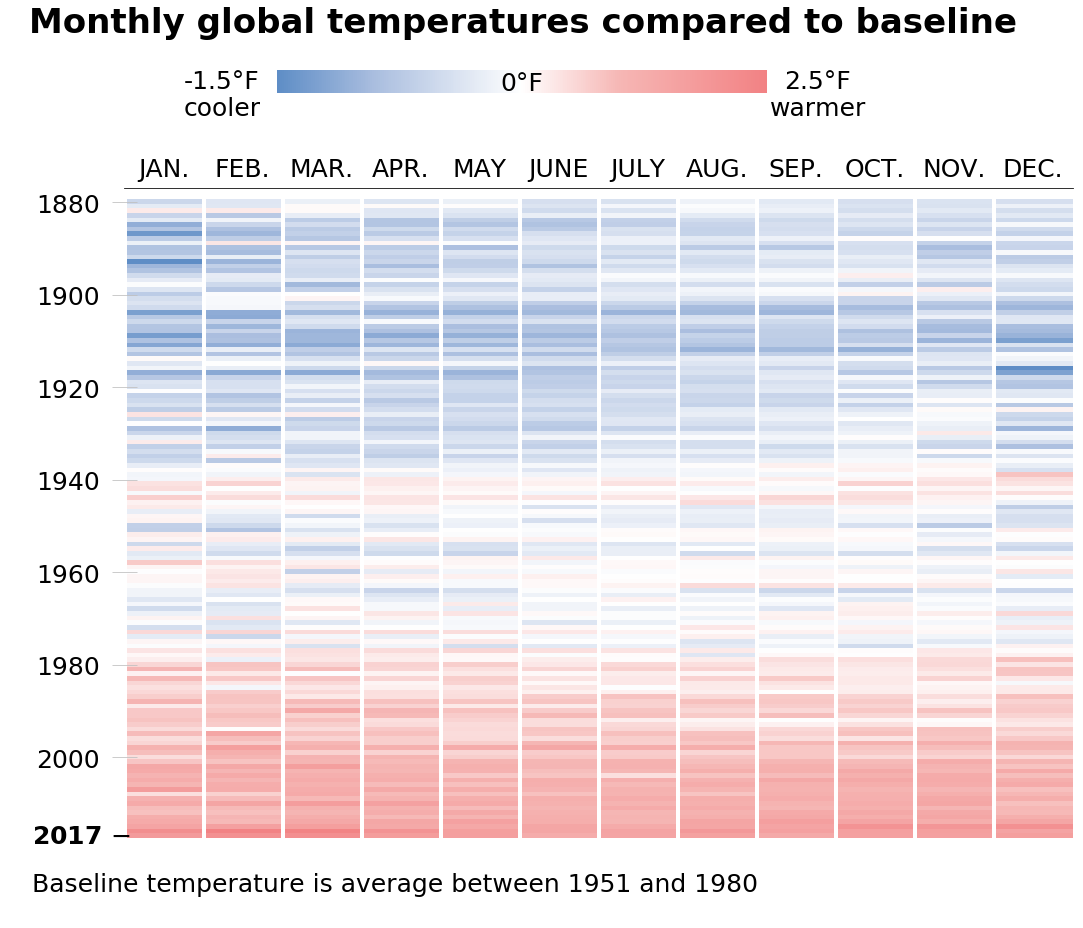

In [9]:
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from mpl_toolkits.axes_grid1.axes_divider import make_axes_locatable
from mpl_toolkits.axes_grid1.colorbar import colorbar

mpl.rcParams['figure.figsize'] = (17,12)
plt.rcParams['ytick.color'] = 'k'
plt.rcParams['xtick.color'] = 'k'
plt.rcParams['font.size'] = 25
plt.rcParams['grid.color'] = 'w'
plt.rcParams['text.color'] = 'k'
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.stretch'] = 'ultra-condensed'

fig = plt.figure()
ax = fig.add_subplot(111)

xticks = ['JAN.', 'FEB.', 'MAR.', 'APR.', 'MAY', 'JUNE', 'JULY', 'AUG.', 'SEP.', 'OCT.', 'NOV.', 'DEC.'] 

yticks = list(np.arange(1860,2017,20)) + [2017]

ax.tick_params(top=True, bottom=False, labeltop=True, labelbottom=False)

ax.xaxis.set_ticks(np.arange(len(xticks)))
ax.xaxis.set_ticklabels(xticks)
ax.xaxis.set_ticks_position('none')

ax.yaxis.set_ticklabels(yticks)
ax.yaxis.set_tick_params(length=25, color=text_RGB, direction='inout', pad=12)

ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['top'].set_linewidth(2)

ax.grid(which='minor', alpha=1)
ax.grid(which='major', alpha=0)
ax.grid(which="minor", linestyle='-', linewidth=4)
ax.xaxis.set_ticks(np.arange(len(xticks)+1)-0.49, minor=True)

ax.set_ylim(len(df),-3)

plt.imshow(df_norm, cmap='BlueRedAlpha', aspect='auto')

cax = fig.add_axes([0.25, 0.99, 0.4, 0.027])
cbar = plt.colorbar(cax=cax, orientation="horizontal",
                    drawedges=False)
cbar.outline.set_visible(False)
cax.xaxis.set_ticks([0])
cax.xaxis.set_ticklabels(['0°F'])
cax.xaxis.set_ticks_position('none')
cax.xaxis.set_tick_params(pad=-25.5)

ax.set_title('Monthly global temperatures compared to baseline', x=0.42, y=1.23,
             fontweight='bold', fontstretch='0', fontsize=34)
ax.annotate(r'2017 $-$', xy=(.0295,.091), xycoords='figure fraction', 
            fontweight='bold')

ax.annotate('Baseline temperature is average between 1951 and 1980',
            xy=(.0295, .06), xycoords='figure fraction',
            horizontalalignment='left', verticalalignment='top')
for i, s in enumerate(['-1.5°F\ncooler','0°F','2.5°F\nwarmer']):
    ax.annotate(s, xy=(.205+i*.275,.925), xycoords='figure fraction',
            horizontalalignment='center', verticalalignment='top', zorder=10)
    
plt.savefig('washpost_reconstructed.png', bbox_inches='tight')
plt.show()